In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
# 0. Train / Test Split
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# check splits
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Text(0.5, 1.0, 'Label is 0')

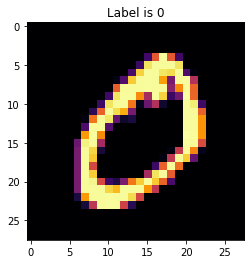

In [ ]:
# explore data a little

import matplotlib.pyplot as plt
index = 1
plt.imshow(train_images[index], cmap="inferno")
plt.title(f"Label is {train_labels[index]}")

In [ ]:
# check unique values
set(train_labels)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [ ]:
# 1. Create a Neural Network
## Dense Dense layers i always a good start
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28))) # this way you can solve 90-95% problems -- start always with this
model.add(layers.Dense(512, activation="relu")) # Dense is the most commmon NL layer (aka fully-connected)
model.add(layers.Dense(10, activation="softmax")) # outpur layer, we want to predict 10 digits
model.summary()

model.compile(
    optimizer="rmsprop", # training algorithm
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 2. Always Normalise data

x_train = train_images.astype("float32") / 255.0 # divide by max to normalise
x_test = test_images.astype("float32") / 255.0


In [ ]:
# 3. Encode categorical data (i.e. labels)
from tensorflow.keras.utils import to_categorical # one-hot encoding

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [ ]:
# print label and one-hot encoding of that label (i.e. a probability distribution)
train_labels[0], y_train[0] 


(5, array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32))

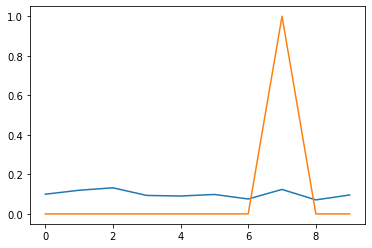

In [ ]:
# lets check predictions before training

# TF expects list, for single values need to convert to list
import numpy as np
x = x_test[0:1] # slicing
x = x_test[0].reshape((1, 28, 28))
x = np.array([x_test[0]])
x = x_test[[0]]

# it has not been trained hence we assume strange results
prediction = model.predict(x) 
plt.plot(prediction[0]) # our prediction (before training .˙. rand. initialised)
plt.plot(y_test[0]) # what we expect


In [ ]:
# check accuracy
model.evaluate(x_test, y_test)
# first number cat. entropy, second is accuracy %
# accuracy is even worse than the random baseline (10% for 10 digits)

313/313 [==============================] - 4s 9ms/step - loss: 2.3334 - accuracy: 0.0949


[2.3334338665008545, 0.09489999711513519]

In [ ]:
# 4. Train
history = model.fit(
    x_train, y_train,
    epochs=5, # how long you consume the entire dataset (5 times each image)
    batch_size=128 # parallel training, the more the faster
)

Epoch 1/5
469/469 [==============================] - 4s 7ms/step - loss: 0.2552 - accuracy: 0.9265
Epoch 2/5
469/469 [==============================] - 3s 7ms/step - loss: 0.1045 - accuracy: 0.9693
Epoch 3/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0677 - accuracy: 0.9794
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0496 - accuracy: 0.9851
Epoch 5/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0368 - accuracy: 0.9889


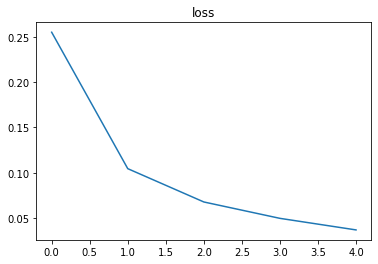

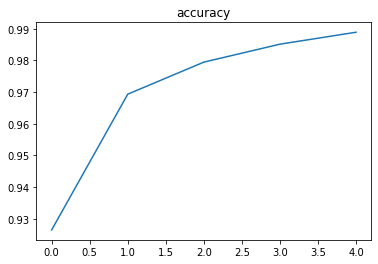

In [ ]:
history.history # to get the dicionary of NL training history 

# plot loss curve of NL over time (epochs)
## tells us how big the error is
plt.plot(history.history["loss"]) 
plt.title("loss")
plt.show()
plt.close()

# plot accuracy curve of NL over time (epochs)
plt.plot(history.history["accuracy"]) 
plt.title("accuracy")
plt.show()
plt.close()

In [ ]:
# 6. Evaluate
# check accuracy after trainning (w/ holdout data)
model.evaluate(x_test, y_test)


313/313 [==============================] - 2s 5ms/step - loss: 0.0610 - accuracy: 0.9809


[0.06097230687737465, 0.98089998960495]

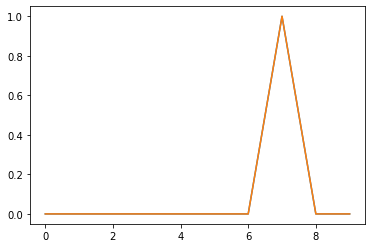

In [ ]:
# lets check predictions after training

# TF expects list, for single values need to convert to list
x = x_test[[0]]

# it has not been trained hence we assume strange results
prediction = model.predict(x) 
plt.plot(prediction[0]) # our prediction
plt.plot(y_test[0]) # what we expect (exactly matches)
